<a href="https://colab.research.google.com/github/Proteanindustries/PythonML/blob/main/support_vector_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Regression (SVR)

## Importing the library

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [32]:
dataset = pd.read_csv('/content/Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
Y = dataset.iloc[:, -1].values

## Feature Scaling

In [37]:
from sklearn.preprocessing import StandardScaler
SC_X = StandardScaler()
SC_Y = StandardScaler()
X = SC_X.fit_transform(X)
Y = SC_Y.fit_transform(Y)

In [76]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [77]:
print(Y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training the SVR model on the whole dataset

In [78]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, Y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Predicting a new result

In [75]:
SC_Y.inverse_transform(regressor.predict(SC_X.transform([[6.5]])))

ValueError: ignored

Correct for 1D array with resphape to 2D array.

In [91]:
SC_Y.inverse_transform(regressor.predict(SC_X.transform([[6.5]])).reshape(1,-1))

array([[170370.0204065]])

## Visualising the SVR results

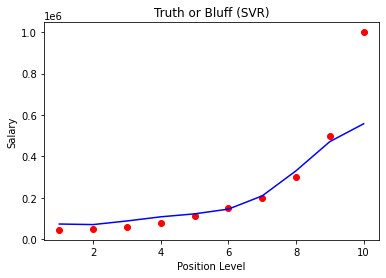

In [90]:
plt.scatter(SC_X.inverse_transform(X), SC_Y.inverse_transform(Y), color = 'red')
plt.plot(SC_X.inverse_transform(X), SC_Y.inverse_transform(regressor.predict(X).reshape(-1,1)), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)

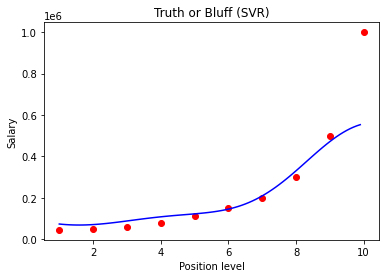

In [99]:
X_grid = np.arange(min(SC_X.inverse_transform(X)), max(SC_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(SC_X.inverse_transform(X), SC_Y.inverse_transform(Y), color = 'red')
plt.plot(X_grid, SC_Y.inverse_transform(regressor.predict(SC_X.transform(X_grid)).reshape(-1,1)), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()